

# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

## I choose this dataset about movies budget, revenue, cast and so on because many people to know how to create the movies and what the requirements and what the cost and revenue in this project we will do the best to get in there
 
## and through this project we will answers these questions:

 # 1-does revenue of those movies rise every year?
 # 2-how many films were shown in each year?
 # 3-what is the max number of average vote?

# we will get the answers at the end.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## here we import all libraries that we'll need it later.

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### here we read a file by read_csv function.

### and represent data with (df.head()).

In [5]:
df.shape

(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### here with two cell above we get more familiar with a data in the dataset

In [7]:
df.drop(['id', 'imdb_id', 'homepage','tagline'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(8)
memory usage: 1.4+ MB


In [9]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 0 to 10865
Data columns (total 17 columns):
popularity              8667 non-null float64
budget                  8667 non-null int64
revenue                 8667 non-null int64
original_title          8667 non-null object
cast                    8667 non-null object
director                8667 non-null object
keywords                8667 non-null object
overview                8667 non-null object
runtime                 8667 non-null int64
genres                  8667 non-null object
production_companies    8667 non-null object
release_date            8667 non-null object
vote_count              8667 non-null int64
vote_average            8667 non-null float64
release_year            8667 non-null int64
budget_adj              8667 non-null float64
revenue_adj             8667 non-null float64
dtypes: float64(4), int64(5), object(8)
memory usage: 1.2+ MB


### and in this step we drop all null value in the dataset.

In [10]:
df=df[(df[['budget','revenue']] !=0).all(axis=1)]

### in the step we find zeros value in [ budget and revenue ] and we deleted these rows.

In [11]:
df.shape

(3678, 17)

### finally this is the final count of rows and column.

# does revenue of those movies rise every year?

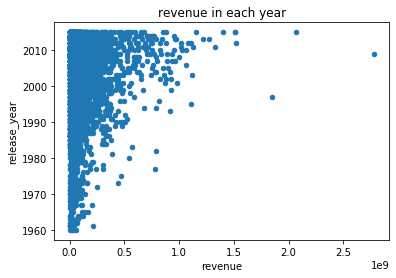

In [14]:
plot = df.plot(x='revenue',y='release_year',kind="scatter");
plot.set_title("revenue in each year");
plot.set_xlabel("revenue");
plot.set_ylabel("release_year");

 ### here as you see at 2010 is the maximum revenue.

## how many films were shown in each year?

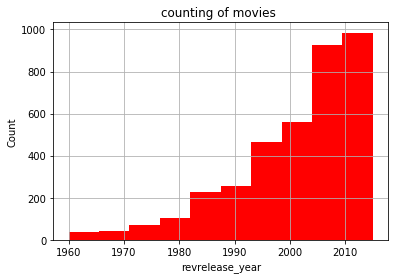

In [18]:
df.release_year.hist(color = 'red');
plt.xlabel('revrelease_year');
plt.ylabel('Count');
plt.title('counting of movies ');

### here, as you see, every year the movies are on display  and you can see jump between 1960 and 2010.

## what is the max number of average vote?

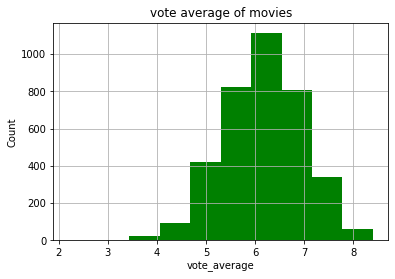

In [12]:
df.vote_average.hist(color = 'green');
plt.xlabel('vote_average');
plt.ylabel('Count');
plt.title('vote average of movies');

### here in 6 as you see vote average there are the most count of moives that the average vote is 6.

# conclusion

## finally, in this project i know more about movies after what i analyzed, i know what the cost and revenue and what the people like to see from genres , vote average of movies and the popularity of movies.

# limitation


## We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only provided dataset. For example, the dataset does not confirm that every release of every director is listed.
## Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards relationship being analyzed. etc.

## thanks for your time.